<a href="https://colab.research.google.com/github/Tien84/BitcoinPrediction/blob/master/demoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Flatten, TimeDistributed, ConvLSTM2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

In [3]:
#hist = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
hist = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin2.csv', parse_dates=True, squeeze=True)
#hist = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin2.csv')
hist = hist.set_index('Date')
hist.index = pd.to_datetime(hist.index)
target_col = 'Adj Close'
hist

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
2022-01-13,43946.742188,44278.421875,42447.042969,42591.570313,42591.570313,47691135082
2022-01-14,42598.871094,43346.687500,41982.617188,43099.699219,43099.699219,23577403399
...,...,...,...,...,...,...
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913
2023-01-07,16952.117188,16975.017578,16914.191406,16955.078125,16955.078125,7714767174
2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914


In [4]:
hist.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
2022-01-13,43946.742188,44278.421875,42447.042969,42591.570313,42591.570313,47691135082
2022-01-14,42598.871094,43346.687500,41982.617188,43099.699219,43099.699219,23577403399


In [5]:
hist.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-06,16836.472656,16991.994141,16716.421875,16951.968750,16951.968750,14413662913
2023-01-07,16952.117188,16975.017578,16914.191406,16955.078125,16955.078125,7714767174
2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914
2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866
2023-01-10,17203.873047,17268.187500,17165.800781,17264.226563,17264.226563,15961652224


In [6]:
from sklearn.preprocessing import MinMaxScaler
df_1=hist.values
df_1=df_1.astype('float32')

scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-10 to 2023-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [7]:
def train_test_split(df, test_size=0.3):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [8]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [9]:
train, test = train_test_split(hist, test_size=0.3)


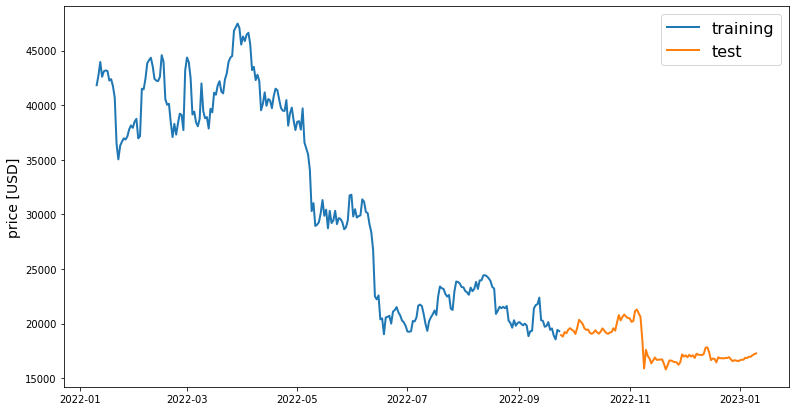

In [10]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [11]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

In [12]:
def extract_window_data(df, window_len=20, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [13]:
def prepare_data(df, target_col, window_len=20, zero_base=True, test_size=0.3):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [14]:
np.random.seed(366)
window_len = 20
test_size = 0.3
zero_base = True
epochs = 20
batch_size = 30

In [15]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [16]:
def build_cnn_model(input_data):
    # define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [17]:
model = build_cnn_model(X_train)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
8/8 [==============================] - 1s 5ms/step - loss: 0.0222
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 8/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 9/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 10/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 11/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 12/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 13/20
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            832       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 50)                28850     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
#print("RMSE: " + str(mean_squared_error(y_test, preds, squared=False)))

3/3 [==============================] - 0s 4ms/step


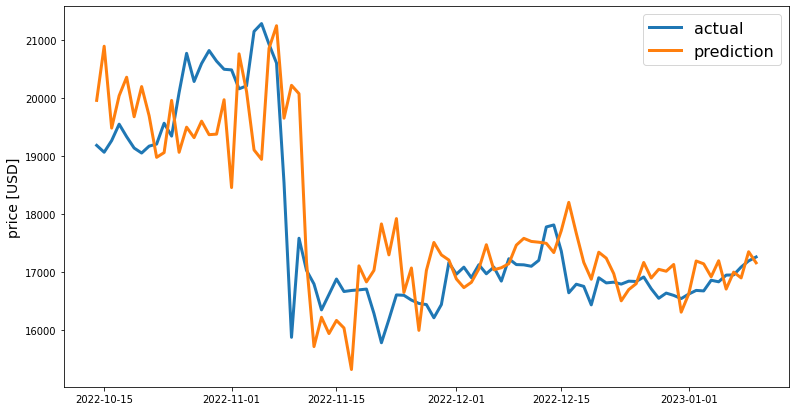

In [20]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Load dữ liệu
data = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin2.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
# tạo bộ scaler
scaler = MinMaxScaler()
# fit scaler vào data
scaler.fit(data)
# Thực hiện scale
normalized = scaler.transform(data)
# quay lại miền giá trị cũ
inverse = scaler.inverse_transform(normalized)

In [ ]:
y_pred = model.predict(X_test)
inv_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mse_test = mean_squared_error(inv_y_test, inv_y_pred)
print("RMSE on Test:", np.sqrt(mse_test))
print("MSE on Test:", mse_test)

In [ ]:
preds = model.predict(X_test)
#preds = scaler.inverse_transform(preds)

Ytest=np.asanyarray(y_test)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)

Ytrain=np.asanyarray(y_train)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

In [ ]:
yhat_inverse = scaler.inverse_transform(preds)
yhat_inverse = yhat_inverse.reshape(-1,1)
y_test_inverse = scaler.inverse_transform(y_test)

In [ ]:
mse = mean_squared_error(inverse, normalized, squared=False)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

#mape = np.mean(np.abs(np.array(normalized) - np.array(inverse))/np.abs(inverse))
mape = np.mean(np.abs(np.array(inverse) - np.array(normalized))/np.abs(normalized))
print('MAPE: ' + str(mape)

In [ ]:
mse = mean_squared_error(y_test, preds, squared=False)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

#print("MAPE: " + str(mean_absolute_percentage_error(y_test, preds)))
mape = np.mean(np.abs(np.array(preds) - np.array(test_size))/np.abs(test_size))
print('MAPE: ' + str(mape))